# CS4035 - Cyber Data Analytics
## Lab 3 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 3 contains 4 main questions + 1 bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number : 10

## Student 1 
### Name : Yuan Tian
### ID : 5816971

## Student 2
### Name : Raphael Frühwirth
### ID : 5897297

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [1]:
# !pip install pyts
# !pip install mmh3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyts.approximation import SymbolicAggregateApproximation #pip install pyts

## 1. Familiarization and discretization task – 1 A4 (5 Points)

In [3]:
data = pd.read_csv("dataset_lab3/dataset_10/capture20110818.binetflow")

In [4]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/18 10:21:46.633335,1.060248,tcp,93.45.239.29,1611,->,147.32.84.118,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt
1,2011/08/18 10:19:49.027650,279.349152,tcp,62.240.166.118,1031,<?>,147.32.84.229,13363,SRPA_PA,0.0,0.0,15,1318,955,flow=Background-TCP-Attempt
2,2011/08/18 10:22:07.160628,166.390015,tcp,147.32.86.148,58067,->,66.235.132.232,80,SR_SA,0.0,0.0,3,212,134,flow=Background-TCP-Established
3,2011/08/18 10:26:02.052163,1.187083,tcp,147.32.3.51,3130,->,147.32.84.46,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt
4,2011/08/18 10:26:52.226748,0.980571,tcp,88.212.37.169,3134,->,147.32.84.118,6881,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt


### 1a. Plot visualizations - Select and visualize two features for modeling the behavior of the infected host.

In [5]:
infected_data = data[data["SrcAddr"] == "147.32.84.165"]
non_infected = data[data["SrcAddr"] == "147.32.86.20"]

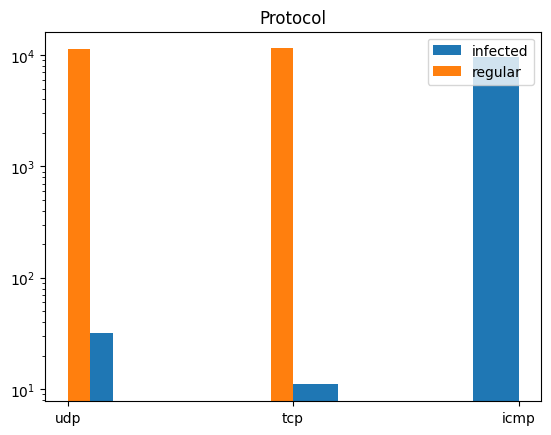

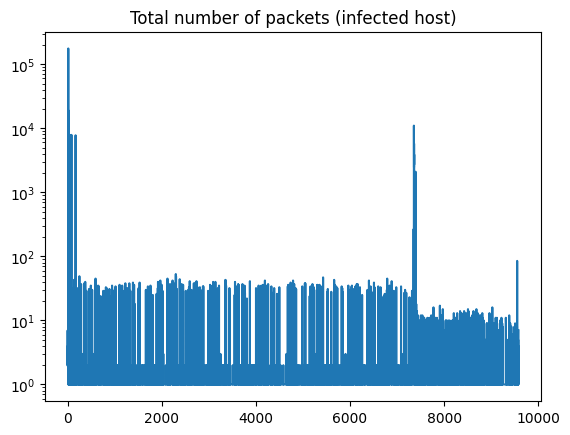

Text(0.5, 1.0, 'Total number of packets (regular)')

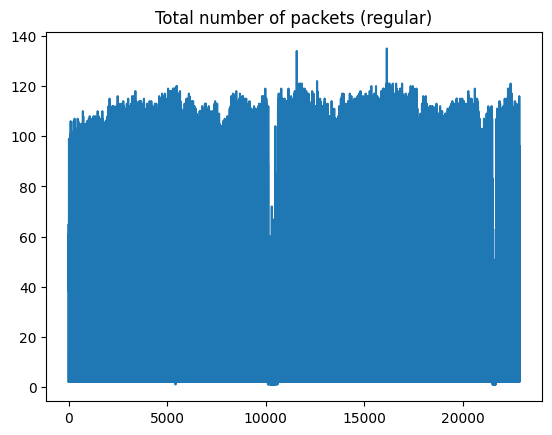

In [6]:
protocol = infected_data['Proto']
total_packets = infected_data['TotPkts']
protocol_normal = non_infected['Proto']
total_packets_normal = non_infected['TotPkts']

plt.hist(protocol, label='infected', log=True)
plt.hist(protocol_normal, label='regular', log=True)
plt.legend()
plt.title("Protocol")
plt.show()

plt.semilogy(range(len(total_packets)), total_packets, label='infected')
plt.title("Total number of packets (infected host)")

plt.show()
plt.plot(range(len(total_packets_normal)), total_packets_normal, label='regular')
plt.title("Total number of packets (regular)")


### 1b. Discretize selected features

In [7]:
def discretize_data(feature_data, num_bins=10, type="bins", percentiles=None):
    if type == "bins":
        bin_boundaries = np.linspace(np.min(feature_data), np.max(feature_data), num_bins)
        bin_indices = np.digitize(feature_data, bin_boundaries)
        return bin_indices
    elif type == "percentile":
        sample = feature_data.sample(frac=0.1, random_state=42)
        percentile_values = np.percentile(np.unique(sorted(total_packets)), percentiles)
        discretized_array = np.digitize(feature_data, percentile_values)
        return discretized_array
    elif type == "SAX":
        sax = SymbolicAggregateApproximation(n_bins=num_bins, strategy='normal')
        saxed_data = sax.transform(feature_data)
        return saxed_data

[  1   2   3   4   5   7   9  11 100]


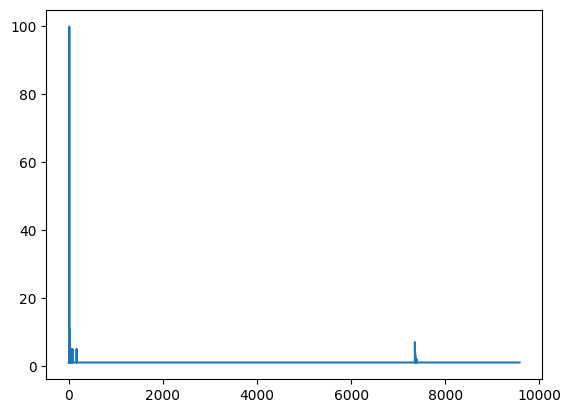

In [8]:
# descrete_duration = descritize_data(protocoll, 20)
# plt.plot(range(len(descrete_duration)), descrete_duration)
# print(np.unique(descrete_duration))
# plt.show()


# bin
discretized_packets = discretize_data(total_packets, 100)
plt.plot(range(len(discretized_packets)), discretized_packets)
print(np.unique(discretized_packets))

[1 2 3]


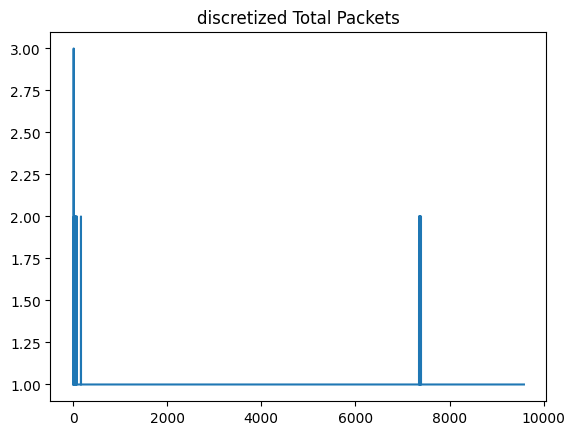

In [9]:
# descrete_duration = descritize_data(duration, type="percentile", percentiles=range(0, 100, 5))
# plt.plot(range(len(descrete_duration)), descrete_duration)
# plt.title("discretized Duration")
# print(np.unique(descrete_duration))
# plt.show()
# percentile
discretized_packets = discretize_data(total_packets, type="percentile", percentiles=[0, 70, 99])
plt.plot(range(len(discretized_packets)), discretized_packets)
plt.title("discretized Total Packets")
print(np.unique(discretized_packets))
plt.show()

# descrete_packets = descritize_data(np.array(total_packets).reshape(-1, 1) , num_bins=10, type="SAX")
# descrete_packets = np.array(descrete_packets)
# plt.plot(range(len(descrete_packets)), descrete_packets)
# plt.title("discretized Total Packets")
# print(np.unique(descrete_packets))
# plt.show()

# np.set_printoptions(suppress=True)
# np.percentile(np.unique(sorted(total_packets)), range(0, 100, 1))

In [12]:
def attribute_encoding(netflow, M_len):
    features = ['TotPkts','Proto']
    k = len(features)
    
    spaceSize = M_len[0] * M_len[1]
#     print("SpaceSize is :", spaceSize)
    
    code = 0
    for i in range(k):
        code += netflow[features[i]] *  spaceSize/M_len[i]
        spaceSize /= M_len[i]
    return code


# discretize features: protocol and the number of packages to all data
discretized_df = data.copy()
# print(list(discretized_df['Proto'].unique()))
# encoding_dict = {"tcp": 0, "udp": 1, "icmp": 2}
# discretized_df.loc[:, 'Proto'] = discretized_df.loc[:, 'Proto'].map(encoding_dict)

from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder on the column with categorical values
discretized_df.loc[:, 'Proto'] = label_encoder.fit_transform(discretized_df['Proto'])


discretized_df.loc[:, 'TotPkts'] = discretize_data(discretized_df.loc[:, 'TotPkts'], type="percentile", percentiles=[0, 70, 99])

M_len = [len(np.unique(discretized_df.loc[:, 'TotPkts'])), len(np.unique(discretized_df.loc[:, 'Proto']))]
print("|M|:",M_len)

discretized_df.loc[:, 'encoded'] = discretized_df.apply(lambda row: attribute_encoding(row, M_len), axis=1).astype(int)

print(np.unique(discretized_df['encoded']), len(np.unique(discretized_df['encoded'])))

|M|: [3, 14]
[14 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 34 36 37 39 40 43 53 54] 24


In [13]:
discretized_df

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,encoded
0,2011/08/18 10:21:46.633335,1.060248,11,93.45.239.29,1611,->,147.32.84.118,6881,S_RA,0.0,0.0,1,252,132,flow=Background-TCP-Attempt,25
1,2011/08/18 10:19:49.027650,279.349152,11,62.240.166.118,1031,<?>,147.32.84.229,13363,SRPA_PA,0.0,0.0,1,1318,955,flow=Background-TCP-Attempt,25
2,2011/08/18 10:22:07.160628,166.390015,11,147.32.86.148,58067,->,66.235.132.232,80,SR_SA,0.0,0.0,1,212,134,flow=Background-TCP-Established,25
3,2011/08/18 10:26:02.052163,1.187083,11,147.32.3.51,3130,->,147.32.84.46,10010,S_RA,0.0,0.0,1,244,124,flow=Background-TCP-Attempt,25
4,2011/08/18 10:26:52.226748,0.980571,11,88.212.37.169,3134,->,147.32.84.118,6881,S_RA,0.0,0.0,1,244,124,flow=Background-TCP-Attempt,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309786,2011/08/18 15:04:59.579762,0.000158,11,219.129.213.146,25463,->,147.32.87.44,80,S_SA,0.0,0.0,1,152,78,flow=Background-TCP-Established,25
1309787,2011/08/18 15:04:59.626719,0.000688,12,213.220.104.152,64126,<->,147.32.84.229,13363,CON,0.0,0.0,1,306,244,flow=Background-UDP-Established,26
1309788,2011/08/18 15:04:59.686325,0.000689,12,59.22.11.248,44432,<->,147.32.84.229,13363,CON,0.0,0.0,1,144,83,flow=Background-UDP-Established,26
1309789,2011/08/18 15:04:59.690632,0.000000,12,95.102.170.66,16978,->,147.32.84.229,13363,INT,0.0,NaN,1,172,172,flow=Background-UDP-Attempt,26


### 1c. Answers and explanation

- Based on the plots, the distributions of protocols differ significantly between regular and infected hosts. Notably, icmp protocol is only observed in infected hosts. Additionally, the number of packages for infected hosts tends to be much larger, with values exceeding 1000 or even 10000, while regular hosts typically have values around 100. Therefore, the most relevant features are 'Proto' and 'TotPkts'.

- In conclusion, if the protocol is icmp or the number of packages exceeds 1000, it is highly indicative of a host being infected.

## 2. Sketching task – 1/2 A4 (Individual, 10 Points)

### 2a. COUNT-MIN sketch


In [44]:
# implement the COUNT-MIN sketch

import mmh3
import random
import numpy as np
    
def count_min_sketch(data, d, w):
    sketch_matrix = np.zeros((d, w), dtype=int)

    seeds = list(range(d))
    
#     store the data
    for item in data:
        for i in range(d):
            index = mmh3.hash(str(item), seeds[i]) % w
            sketch_matrix[i, index] += 1

    unique3gram = []
    for item in data:
        if item not in unique3gram:
            unique3gram.append(item)
#     len(unique3gram)
          
# retreive the data
    results = []
    for item in unique3gram:
        min_ = float('inf')
        for i in range(d):
            index = mmh3.hash(str(item), seeds[i]) % w
            if sketch_matrix[i, index] < min_:
                min_ = sketch_matrix[i, index]
        results.append(min_)
    
    matrix_size = sketch_matrix.itemsize * d * w
    return results, matrix_size

In [15]:
# Generate 3-grams
n_gram_size = 3
encoded_list = discretized_df['encoded'].tolist()
three_gram = [encoded_list[i:i+n_gram_size] for i in range(len(encoded_list)-n_gram_size)]

In [53]:
%%time

# regular frequency estimation
frequency_count = dict()
for item in three_gram:
    frequency_count[str(item)] = frequency_count.get(str(item), 0)+1
    
# Get indices of top 10 values
frequency_list = list(frequency_count.values())
indices = np.argsort(frequency_list)[::-1]
indices = indices[:10]
top_values = [frequency_list[i] for i in indices]

print("top 10 frequent 3grams and their indices: ")
for i, value in zip(indices, top_values):
    print(f"Index: {i}, Value: {value}")
    
frequency_count_size =  len(frequency_count) * np.array(list(frequency_count.values())).itemsize + len(frequency_count) * np.array(list(frequency_count.keys())).itemsize
print("\n the size of dict storing the counts is {} bytes \n".format(frequency_count_size))

top 10 frequent 3grams and their indices: 
Index: 45, Value: 543378
Index: 32, Value: 107160
Index: 44, Value: 106906
Index: 152, Value: 101157
Index: 48, Value: 93170
Index: 0, Value: 80698
Index: 43, Value: 54446
Index: 17, Value: 53961
Index: 42, Value: 40112
Index: 63, Value: 11211

 the size of dict storing the counts is 29952 bytes 

CPU times: total: 3.86 s
Wall time: 4.09 s


height = 20, width changes:
Execution time: 73.2615156173706 seconds for w = 5 and h = 20
Index: 45, Value: 553427
Index: 32, Value: 118106
Index: 44, Value: 120252
Index: 152, Value: 122523
Index: 48, Value: 123744
Index: 0, Value: 98879
Index: 43, Value: 74976
Index: 17, Value: 66364
Index: 42, Value: 47926
Index: 63, Value: 36896
the size of matrix is 400 bytes
Execution time: 73.87695026397705 seconds for w = 20 and h = 20
Index: 45, Value: 544020
Index: 32, Value: 107409
Index: 44, Value: 107199
Index: 152, Value: 103998
Index: 48, Value: 93822
Index: 0, Value: 81403
Index: 43, Value: 55319
Index: 17, Value: 54546
Index: 42, Value: 40450
Index: 63, Value: 11752
the size of matrix is 1600 bytes
Execution time: 73.98219799995422 seconds for w = 50 and h = 20
Index: 45, Value: 543448
Index: 32, Value: 107230
Index: 44, Value: 106920
Index: 152, Value: 101210
Index: 48, Value: 93203
Index: 0, Value: 80821
Index: 43, Value: 54502
Index: 17, Value: 53998
Index: 42, Value: 40161
Index: 6

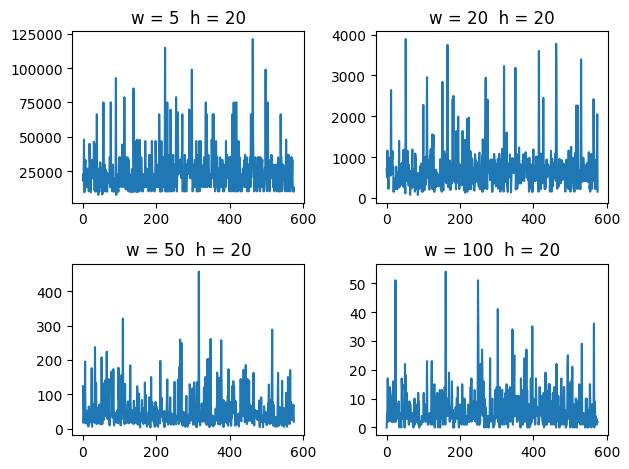

height changes, width = 20: 
Execution time: 22.852601528167725 seconds for w = 20 and h = 5
Index: 45, Value: 544217
Index: 32, Value: 110355
Index: 44, Value: 113174
Index: 152, Value: 104894
Index: 48, Value: 94664
Index: 0, Value: 81895
Index: 43, Value: 55319
Index: 17, Value: 56957
Index: 42, Value: 40464
Index: 63, Value: 11752
the size of matrix is 400 bytes
Execution time: 76.42436218261719 seconds for w = 20 and h = 20
Index: 45, Value: 544020
Index: 32, Value: 107409
Index: 44, Value: 107199
Index: 152, Value: 103998
Index: 48, Value: 93822
Index: 0, Value: 81403
Index: 43, Value: 55319
Index: 17, Value: 54546
Index: 42, Value: 40450
Index: 63, Value: 11752
the size of matrix is 1600 bytes
Execution time: 176.35804343223572 seconds for w = 20 and h = 50
Index: 45, Value: 543901
Index: 32, Value: 107409
Index: 44, Value: 107199
Index: 152, Value: 101418
Index: 48, Value: 93822
Index: 0, Value: 80974
Index: 43, Value: 55319
Index: 17, Value: 54273
Index: 42, Value: 40450
Index

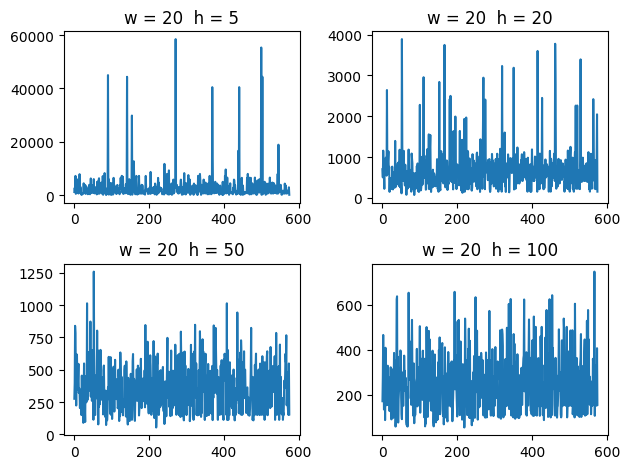

In [56]:
# Different combinations of widths and heights

import matplotlib.pyplot as plt
import time

widths = [5, 20, 50, 100]
heights = [5, 20, 50, 100]

print("height = 20, width changes:")
fig, axes = plt.subplots(2, 2)
for i, ax in enumerate(axes.flat):
#     track time
    start_time = time.time()
    sketch_results, matrix_size = count_min_sketch(three_gram, 20, widths[i])
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time: {execution_time} seconds for w = {widths[i]} and h = 20")
    
#     plot the distributions for difference between results and real counts
    ax.plot(range(len(sketch_results)), np.array(sketch_results) - np.array(list(frequency_count.values())))
    ax.set_title(f"w = {widths[i]}  h = 20")
    
    # Get indices of top 10 values
    indices = np.argsort(frequency_list)[::-1]
    indices = indices[:10]
    top_values = [sketch_results[j] for j in indices]

    # Print top values and their indices
    for j, value in zip(indices, top_values):
        print(f"Index: {j}, Value: {value}")
        
    print("the size of matrix is {} bytes".format(matrix_size))

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


print("height changes, width = 20: ")
fig, axes = plt.subplots(2, 2)
for i, ax in enumerate(axes.flat):
#     track time
    start_time = time.time()
    sketch_results,matrix_size = count_min_sketch(three_gram, heights[i], 20)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time: {execution_time} seconds for w = 20 and h = {heights[i]}")
    
#     plot the distributions for difference between results and real counts
    ax.plot(range(len(sketch_results)), np.array(sketch_results) - np.array(list(frequency_count.values())))
    ax.set_title(f"w = 20  h = {heights[i]}")
    
    # Get indices of top 10 values
    indices = np.argsort(frequency_list)[::-1]
    indices = indices[:10]
    top_values = [sketch_results[j] for j in indices]

    # Print top values and their indices
    for j, value in zip(indices, top_values):
        print(f"Index: {j}, Value: {value}")
        
    print("the size of matrix is {} bytes".format(matrix_size))

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

In [32]:
# compare the total counts
sum_sketch = np.sum(sketch_results)
sum_frequency = np.sum(list(frequency_count.values()))
sum_sketch, sum_frequency

(1624494, 1309788)

### 2b. Analysis and answers to the questions

| height | width | run-time(s) | space(bytes)  |
|--------|-------|----------|--------|
| 20     | 5     | 73.26    | 400    |
| 20     | 20    | 73.87    | 1600   |
| 20     | 50    | 73.98    | 4000   |
| 20     | 100   | 75.59    | 8000   |
| 5      | 20    | 22.85    | 400    |
| 50     | 20    | 176.35   | 4000   |
| 100    | 20    | 318.85   | 8000   |
| frequency | -   | 3.86     | 29952  |


- From the plots we can observe that:

    Increasing the width of the sketch matrix improves performance by reducing the scaling of the y-axis (difference between real frequency and estimation) in the plots. This is because a wider matrix helps spread the counts, leading to better results.
    
    Similarly, increasing the height of the sketch matrix also enhances performance, which can be explained by the fact that adding another hash function quickly reduces the probability of bad errors. However, increasing the number of hash functions significantly increases the algorithm's computational cost.


- By comparing count-min estimation with different sketch matrix sizes with direct counting of 3-grams, we can observe that the top 10 estimated 3-grams are the same, though the exact frequency estimation may differ. In addtion, the count-min sketch requires more time to compute but reduces memory usage significantly compared to direct counting.


- In conclusion, I recommend using the count-min sketch algorithm to estimate item frequencies, especially when the focus is on finding the most frequent items rather than exact frequency. It is easy to implement and reduces space requirements while accepting a slight compromise in computation time.

## 3. Min-wise locality sensitive hashing task – 1/2 A4 (Individual, 10 Points)

### 3a. Implementation

### 3b. Analysis and answers to the questions

## 4.Botnet profiling and fingerprinting task – 1 A4 (5 Points)

### 4a. Learn a sequential model, profiling and fingerprinting

### 4b. Analysis and answers to the questions.

## 5. Bonus Task 1/2 A4 (5 Points)

### 5a. Provide implementation and analysis.